In [2]:
import numpy as np
import pickle
import math
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import time
import pprint
import seaborn as sns
import statsmodels.formula.api as smf
import CMR_IA as cmr
import scipy as sp
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16

In [3]:
with open("simu7_data/simu7_design.pkl", 'rb') as inp:
    df_study = pickle.load(inp)
    df_test = pickle.load(inp)
# df_study = df_study.loc[df_study.session < 500]
# df_test = df_test.loc[df_test.session < 500]

In [991]:
df_study

,study_itemno1,study_itemno2,study_item1,study_item2,serial_pos,list,session
0,110,1083,BED,PLANT,0,0,0
1,1262,1627,SEAL,WRITER,1,0,0
2,738,1198,INMATE,ROBE,2,0,0
3,187,748,BUG,JAM,3,0,0
4,1423,1072,SWORD,PIN,4,0,0
...,...,...,...,...,...,...,...
191995,187,1314,BUG,SKELETON,7,15,999
191996,1438,1433,TAXI,TAPE,8,15,999
191997,1537,1489,UNDERWEAR,TOWEL,9,15,999
191998,386,283,COUCH,CHAUFFEUR,10,15,999


In [992]:
df_test

,test_itemno,test_item,correct_ans,study_pos,test_dir,list,session
0,324,CLIPPERS,823,9,1,0,0
1,1347,SPARROW,1051,8,1,0,0
2,413,CROSS,524,7,0,0,0
3,812,LEOPARD,1323,5,0,0,0
4,110,BED,1083,0,0,0,0
...,...,...,...,...,...,...,...
127995,947,NEUTRON,402,11,0,15,999
127996,467,DINER,1441,2,1,15,999
127997,1444,TEENAGER,1014,4,0,15,999
127998,1489,TOWEL,1537,9,1,15,999


### Run CMR-IA

In [993]:
s_mat = np.load('../../Data/wordpools/ltp_FR_similarity_matrix.npy')

In [994]:
params = cmr.make_default_params()
params.update(
    beta_enc = 0.6,  # 0.6
    beta_rec = 0.1,
    beta_cue = 0.6,
    beta_distract = 0.1,
    beta_rec_post = 0.1,
    gamma_fc = 0.55,  # 0.4
    gamma_cf = 0.7,  # 0.6, cf - fc Higher, ILI +1 Higher
    s_fc = 0.15,  # 0.2
    s_cf = 0.15,  # 0.2
    c_thresh = 0.2,  # 0.01
    kappa = 0.04, # 0.05
    lamb = 0.01,  # 0.02
    eta = 0.02,  # 0.02, raise it can diminish the diff between +1 and +2
    omega = 5,  # this is important for increasing PLI num
    alpha = 1,
    phi_s = 0.25,  # 0.3, control the plateau of left and right side of ILI
    phi_d = 0.5,
    nitems_in_accumulator = 96,  # 48
    d_ass = 0,
    use_new_context = True,
)
params

{'beta_enc': 0.6,
 'beta_rec': 0.1,
 'beta_cue': 0.6,
 'beta_rec_post': 0.1,
 'beta_distract': 0.1,
 'phi_s': 0.25,
 'phi_d': 0.5,
 's_cf': 0.15,
 's_fc': 0.15,
 'kappa': 0.04,
 'eta': 0.02,
 'omega': 5,
 'alpha': 1,
 'c_thresh': 0.2,
 'c_thresh_itm': 0.5,
 'c_thresh_ass': 0.5,
 'd_ass': 0,
 'lamb': 0.01,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 96,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 20,
 'm': 0,
 'n': 1,
 'c1': 0,
 'thresh_sigma': 0,
 'No_recall': None,
 'var_enc': 1,
 'bad_enc_ratio': 1,
 'gamma_fc': 0.55,
 'gamma_cf': 0.7,
 'use_new_context': True}

In [995]:
df_simu, f_in, f_dif = cmr.run_norm_cr_multi_sess(params,df_study, df_test ,s_mat)
df_simu

CMR2 Time: 389.90530729293823


,list,session,test_itemno,s_resp,s_rt,csim
0,0,0,324,1347.0,1110.0,0.608993
1,0,0,1347,823.0,1210.0,0.725537
2,0,0,413,524.0,1020.0,0.764541
3,0,0,812,1323.0,1670.0,0.746974
4,0,0,110,1072.0,1870.0,0.559476
...,...,...,...,...,...,...
127995,15,999,947,402.0,1400.0,0.762125
127996,15,999,467,1441.0,2250.0,0.675645
127997,15,999,1444,1285.0,1590.0,0.472891
127998,15,999,1489,89.0,1750.0,0.541939


In [996]:
df_simu = df_simu.merge(df_test,on=['session','list','test_itemno'])
df_simu['correct'] = df_simu.s_resp == df_simu.correct_ans
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct
0,0,0,324,1347.0,1110.0,0.608993,CLIPPERS,823,9,1,False
1,0,0,1347,823.0,1210.0,0.725537,SPARROW,1051,8,1,False
2,0,0,413,524.0,1020.0,0.764541,CROSS,524,7,0,True
3,0,0,812,1323.0,1670.0,0.746974,LEOPARD,1323,5,0,True
4,0,0,110,1072.0,1870.0,0.559476,BED,1083,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...
127995,15,999,947,402.0,1400.0,0.762125,NEUTRON,402,11,0,True
127996,15,999,467,1441.0,2250.0,0.675645,DINER,1441,2,1,True
127997,15,999,1444,1285.0,1590.0,0.472891,TEENAGER,1014,4,0,False
127998,15,999,1489,89.0,1750.0,0.541939,TOWEL,1537,9,1,False


In [997]:
sessions = np.unique(df_simu.session)
nlist = len(np.unique(df_simu.list))
resp_study_list = []
resp_study_pos = []
for sess in sessions:
    
    pres_words = df_study.loc[df_study.session == sess, ['study_itemno1','study_itemno2']].to_numpy()
    pres_words = np.reshape(pres_words,(nlist,-1,2))
    responses = df_simu.loc[df_simu.session == sess, 's_resp']

    for r in responses:
        if r == -1 or r == -2:
            r_list = None
            r_pos = None
        else:
            r_list = np.where(pres_words==r)[0].item()
            r_pos = np.where(pres_words==r)[1].item()
        resp_study_list.append(r_list)
        resp_study_pos.append(r_pos)

df_simu['resp_study_list'] = resp_study_list
df_simu['resp_study_pos'] = resp_study_pos
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos
0,0,0,324,1347.0,1110.0,0.608993,CLIPPERS,823,9,1,False,0.0,8.0
1,0,0,1347,823.0,1210.0,0.725537,SPARROW,1051,8,1,False,0.0,9.0
2,0,0,413,524.0,1020.0,0.764541,CROSS,524,7,0,True,0.0,7.0
3,0,0,812,1323.0,1670.0,0.746974,LEOPARD,1323,5,0,True,0.0,5.0
4,0,0,110,1072.0,1870.0,0.559476,BED,1083,0,0,False,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127995,15,999,947,402.0,1400.0,0.762125,NEUTRON,402,11,0,True,15.0,11.0
127996,15,999,467,1441.0,2250.0,0.675645,DINER,1441,2,1,True,15.0,2.0
127997,15,999,1444,1285.0,1590.0,0.472891,TEENAGER,1014,4,0,False,13.0,0.0
127998,15,999,1489,89.0,1750.0,0.541939,TOWEL,1537,9,1,False,13.0,2.0


In [998]:
df_simu['list_lag'] = df_simu['resp_study_list'] - df_simu['list']
df_simu['pos_lag'] = df_simu['resp_study_pos'] - df_simu['study_pos']

def which_intrusion(x):
    x_list_lag = x['list_lag']
    x_pos_lag = x['pos_lag']

    if math.isnan(x_list_lag):
        return 'NoResp'
    elif x_list_lag == 0 and x_pos_lag == 0:
        return 'Correct'
    elif x_list_lag != 0:
        return 'PLI'
    elif x_list_lag == 0 and x_pos_lag != 0:
        return 'ILI'
    else:
        return 'Else'

df_simu['intrusion_type'] = df_simu.apply(lambda x:which_intrusion(x),axis=1)
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
0,0,0,324,1347.0,1110.0,0.608993,CLIPPERS,823,9,1,False,0.0,8.0,0.0,-1.0,ILI
1,0,0,1347,823.0,1210.0,0.725537,SPARROW,1051,8,1,False,0.0,9.0,0.0,1.0,ILI
2,0,0,413,524.0,1020.0,0.764541,CROSS,524,7,0,True,0.0,7.0,0.0,0.0,Correct
3,0,0,812,1323.0,1670.0,0.746974,LEOPARD,1323,5,0,True,0.0,5.0,0.0,0.0,Correct
4,0,0,110,1072.0,1870.0,0.559476,BED,1083,0,0,False,0.0,4.0,0.0,4.0,ILI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127995,15,999,947,402.0,1400.0,0.762125,NEUTRON,402,11,0,True,15.0,11.0,0.0,0.0,Correct
127996,15,999,467,1441.0,2250.0,0.675645,DINER,1441,2,1,True,15.0,2.0,0.0,0.0,Correct
127997,15,999,1444,1285.0,1590.0,0.472891,TEENAGER,1014,4,0,False,13.0,0.0,-2.0,-4.0,PLI
127998,15,999,1489,89.0,1750.0,0.541939,TOWEL,1537,9,1,False,13.0,2.0,-2.0,-7.0,PLI


In [999]:
# clean list 1
df_simu = df_simu.query("list > 0")
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
8,1,0,1141,1248.0,1330.0,0.782331,PUMP,1248,10,1,True,1.0,10.0,0.0,0.0,Correct
9,1,0,1540,506.0,1380.0,0.672929,UNIVERSE,232,9,0,False,1.0,11.0,0.0,2.0,ILI
10,1,0,528,232.0,1190.0,0.747714,EMERALD,1590,8,1,False,1.0,9.0,0.0,1.0,ILI
11,1,0,506,1534.0,2040.0,0.753106,DUNE,1534,11,0,True,1.0,11.0,0.0,0.0,Correct
12,1,0,844,999.0,1680.0,0.602817,LOOP,396,5,1,False,1.0,6.0,0.0,1.0,ILI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127995,15,999,947,402.0,1400.0,0.762125,NEUTRON,402,11,0,True,15.0,11.0,0.0,0.0,Correct
127996,15,999,467,1441.0,2250.0,0.675645,DINER,1441,2,1,True,15.0,2.0,0.0,0.0,Correct
127997,15,999,1444,1285.0,1590.0,0.472891,TEENAGER,1014,4,0,False,13.0,0.0,-2.0,-4.0,PLI
127998,15,999,1489,89.0,1750.0,0.541939,TOWEL,1537,9,1,False,13.0,2.0,-2.0,-7.0,PLI


In [1000]:
df_simu.head(12)

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
8,1,0,1141,1248.0,1330.0,0.782331,PUMP,1248,10,1,True,1.0,10.0,0.0,0.0,Correct
9,1,0,1540,506.0,1380.0,0.672929,UNIVERSE,232,9,0,False,1.0,11.0,0.0,2.0,ILI
10,1,0,528,232.0,1190.0,0.747714,EMERALD,1590,8,1,False,1.0,9.0,0.0,1.0,ILI
11,1,0,506,1534.0,2040.0,0.753106,DUNE,1534,11,0,True,1.0,11.0,0.0,0.0,Correct
12,1,0,844,999.0,1680.0,0.602817,LOOP,396,5,1,False,1.0,6.0,0.0,1.0,ILI
13,1,0,586,396.0,1150.0,0.715013,FLY,1446,4,1,False,1.0,5.0,0.0,1.0,ILI
14,1,0,1093,35.0,1190.0,0.775836,POCKET,35,2,0,True,1.0,2.0,0.0,0.0,Correct
15,1,0,666,1119.0,1280.0,0.497438,GROUND,456,3,0,False,1.0,0.0,0.0,-3.0,ILI
16,2,0,173,414.0,1200.0,0.810147,BRIDE,414,10,0,True,2.0,10.0,0.0,0.0,Correct
17,2,0,492,920.0,1540.0,0.530965,DRAGON,845,11,0,False,2.0,0.0,0.0,-11.0,ILI


In [1001]:
df_simu.groupby("intrusion_type")["list"].count()

intrusion_type
Correct    44678
ILI        64613
NoResp        46
PLI        10663
Name: list, dtype: int64

In [1002]:
df_simu.query("s_resp == -2")

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type


In [1003]:
# correct rate
sum(df_simu.correct)/len(df_simu.correct)

0.3723166666666667

In [1004]:
df_simu.to_pickle("simu7_data/simu7_result.pkl")

In [1005]:
# sessions = df_simu.session.to_numpy()
# for sess in sessions:
#     df_tmp = df_study.loc[df_study.session == sess]
#     tmp1 = df_tmp.study_itemno1.to_numpy()
#     tmp2 = df_tmp.study_itemno2.to_numpy()
#     tmp = np.concatenate((tmp1, tmp2))
#     tmp = np.sort(tmp)
#     testid = np.searchsorted(tmp, df_simu.test_itemno[sess].item())
#     corrid = np.searchsorted(tmp, df_simu.correct_ans[sess].item())
#     df_simu.loc[df_simu.session == sess, 'corr_fin']= f_in[sess][corrid]
#     df_simu.loc[df_simu.session == sess, 'omean_fin'] = np.mean(np.delete(f_in[sess], [testid,corrid]))
#     df_simu.loc[df_simu.session == sess, 'omax_fin'] = np.delete(f_in[sess], [testid,corrid]).max()
# df_simu

In [1006]:
# df_fin = df_simu.groupby('lag')['corr_fin','omean_fin','omax_fin'].mean().reset_index()
# df_fin['dif'] = df_fin['corr_fin'] - df_fin['omax_fin']
# df_fin

In [1007]:
# sns.lineplot(data=df_fin, x='lag', y='corr_fin', linewidth=2, marker='o', markersize = 7)
# sns.lineplot(data=df_fin, x='lag', y='omean_fin', linewidth=2, marker='o', markersize = 7)
# sns.lineplot(data=df_fin, x='lag', y='omax_fin', linewidth=2, marker='o', markersize = 7)
# # plt.ylim([0,1])
# plt.xlabel('Test Lag')
# plt.ylabel('f_in')
# # plt.savefig('fig/simu3_hr.pdf')
# plt.show()

In [1008]:
# sns.lineplot(data=df_fin, x='lag', y='dif', linewidth=2, marker='o', markersize = 7)
# # plt.ylim([0,1])
# plt.xlabel('Test Lag')
# plt.ylabel('f_in')
# # plt.savefig('fig/simu3_hr.pdf')
# plt.show()

### PLI

In [4]:
with open("simu7_data/simu7_result.pkl", 'rb') as inp:
    df_simu = pickle.load(inp)

In [5]:
df_PLI = df_simu.query("intrusion_type == 'PLI' and list > 5")
df_PLI = df_PLI.query("list_lag > -6")
PLI_num = df_PLI.shape[0]
df_PLIgp = df_PLI.groupby("list_lag")['test_item'].count().to_frame(name='PLI_cnt').reset_index()
df_PLIgp['list_abs_lag'] = np.abs(df_PLIgp['list_lag'])
df_PLIgp['PLI_prob'] = df_PLIgp['PLI_cnt'] / PLI_num
df_PLIgp

,list_lag,PLI_cnt,list_abs_lag,PLI_prob
0,-5.0,822,5.0,0.143581
1,-4.0,962,4.0,0.168035
2,-3.0,1041,3.0,0.181834
3,-2.0,1147,2.0,0.200349
4,-1.0,1753,1.0,0.306201


In [6]:
df_PLI

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
50,6,0,265,429.0,1860.0,0.581380,CEILING,249,11,1,False,3.0,1.0,-3.0,-10.0,PLI
53,6,0,923,1628.0,1930.0,0.472120,MOTORCYCLE,1273,4,0,False,1.0,0.0,-5.0,-4.0,PLI
78,9,0,1331,1318.0,2250.0,0.513163,SNACK,682,11,1,False,5.0,2.0,-4.0,-9.0,PLI
79,9,0,395,762.0,1370.0,0.559889,COWBOY,941,5,0,False,4.0,3.0,-5.0,-2.0,PLI
80,10,0,1625,661.0,1980.0,0.477089,WRENCH,158,11,1,False,9.0,0.0,-1.0,-11.0,PLI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127953,10,999,1086,657.0,1680.0,0.563293,PLATE,1500,1,1,False,6.0,1.0,-4.0,0.0,PLI
127957,10,999,977,1021.0,1710.0,0.568807,ONION,52,3,0,False,7.0,3.0,-3.0,0.0,PLI
127997,15,999,1444,1285.0,1590.0,0.472891,TEENAGER,1014,4,0,False,13.0,0.0,-2.0,-4.0,PLI
127998,15,999,1489,89.0,1750.0,0.541939,TOWEL,1537,9,1,False,13.0,2.0,-2.0,-7.0,PLI


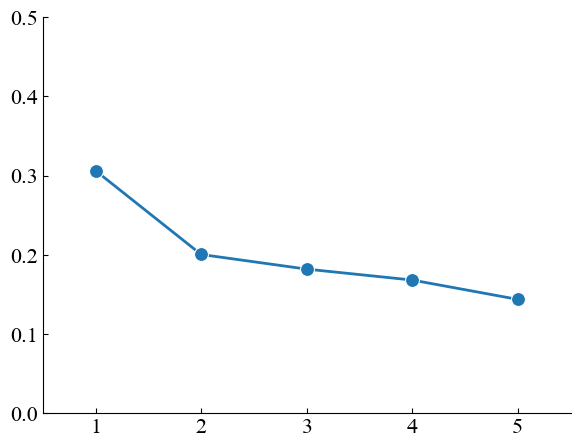

In [7]:
fig, ax = plt.subplots(figsize=(6,4.5))
fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_PLIgp.query("list_abs_lag < 6"), x='list_abs_lag', y='PLI_prob', linewidth=2, marker='o', markersize = 10)
plt.ylim([0,0.5])
plt.xlim([0.5,5.5])
plt.xticks(ticks=np.arange(1,6))
plt.xlabel('Lag')
plt.ylabel('Intrusion Conditional Response Probablility')
ax.set(xlabel=None, ylabel=None)
# plt.tick_params(labelleft=False)

plt.savefig('simu7_fig/simu7_PLI.pdf')
plt.show()

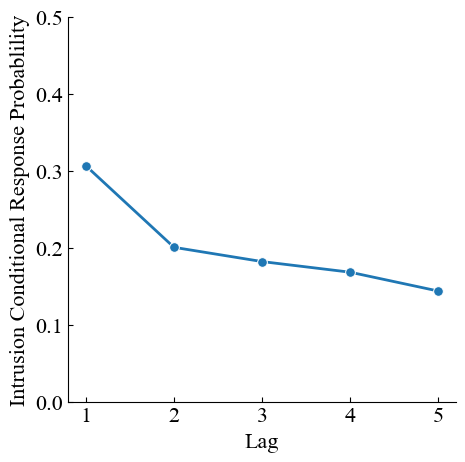

In [8]:
fig,ax = plt.subplots(figsize=(5,5))
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_PLIgp, x='list_abs_lag', y='PLI_prob', linewidth=2, marker='o', markersize = 7)
plt.ylim([0,0.5])
# plt.xlim([0.5,5.5])
# plt.xticks(ticks=np.arange(1,6))
plt.xlabel('Lag')
plt.ylabel('Intrusion Conditional Response Probablility')
# plt.savefig('fig/simu7_PLI.pdf')
plt.show()

### ILI

In [9]:
df_ILI = df_simu.query("intrusion_type == 'ILI'")
df_ILI

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
9,1,0,1540,506.0,1380.0,0.672929,UNIVERSE,232,9,0,False,1.0,11.0,0.0,2.0,ILI
10,1,0,528,232.0,1190.0,0.747714,EMERALD,1590,8,1,False,1.0,9.0,0.0,1.0,ILI
12,1,0,844,999.0,1680.0,0.602817,LOOP,396,5,1,False,1.0,6.0,0.0,1.0,ILI
13,1,0,586,396.0,1150.0,0.715013,FLY,1446,4,1,False,1.0,5.0,0.0,1.0,ILI
15,1,0,666,1119.0,1280.0,0.497438,GROUND,456,3,0,False,1.0,0.0,0.0,-3.0,ILI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127983,13,999,1580,134.0,1900.0,0.680050,WAITER,1338,7,1,False,13.0,8.0,0.0,1.0,ILI
127984,14,999,136,118.0,2140.0,0.741054,BLENDER,527,7,0,False,14.0,11.0,0.0,4.0,ILI
127987,14,999,1356,966.0,1970.0,0.648686,SPOOL,1637,9,0,False,14.0,10.0,0.0,1.0,ILI
127989,14,999,1347,1538.0,2300.0,0.635975,SPARROW,966,10,1,False,14.0,11.0,0.0,1.0,ILI


In [10]:
df_ILI.groupby("list")["pos_lag"].mean()

list
1    -0.544196
2    -0.590442
3    -0.303234
4    -0.320558
5    -0.480923
6    -0.458314
7    -0.430248
8    -0.349444
9    -0.425963
10   -0.450208
11   -0.504282
12   -0.451119
13   -0.311927
14   -0.397854
15   -0.366802
Name: pos_lag, dtype: float64

In [11]:
possible_ILI_cnt = {}
for pair_pos in df_ILI.study_pos:
    l_bound = -pair_pos
    r_bound = 11 - pair_pos
    for i in np.arange(l_bound, r_bound + 1):
        if i in possible_ILI_cnt:
            possible_ILI_cnt[i] += 1
        else:
            possible_ILI_cnt[i] = 1
possible_ILI_cnt

{-9: 15628,
 -8: 21402,
 -7: 27283,
 -6: 33087,
 -5: 38970,
 -4: 44842,
 -3: 50481,
 -2: 56001,
 -1: 60911,
 0: 64613,
 1: 60086,
 2: 54700,
 3: 48985,
 4: 43211,
 5: 37330,
 6: 31526,
 7: 25643,
 8: 19771,
 -11: 4527,
 -10: 9913,
 9: 14132,
 10: 8612,
 11: 3702}

In [12]:
df_ILIgp = df_ILI.groupby("pos_lag")['test_item'].count().to_frame(name='ILI_cnt')
df_ILIgp['poss_ILI_cnt'] = pd.Series(possible_ILI_cnt)
df_ILIgp['ILI_prob'] = df_ILIgp['ILI_cnt'] / df_ILIgp['poss_ILI_cnt']
df_ILIgp

,ILI_cnt,poss_ILI_cnt,ILI_prob
pos_lag,,,
-11.0,673,4527,0.148664
-10.0,1046,9913,0.105518
-9.0,1247,15628,0.079793
-8.0,1452,21402,0.067844
-7.0,1714,27283,0.062823
-6.0,1814,33087,0.054825
-5.0,2292,38970,0.058814
-4.0,2692,44842,0.060033
-3.0,3624,50481,0.071789


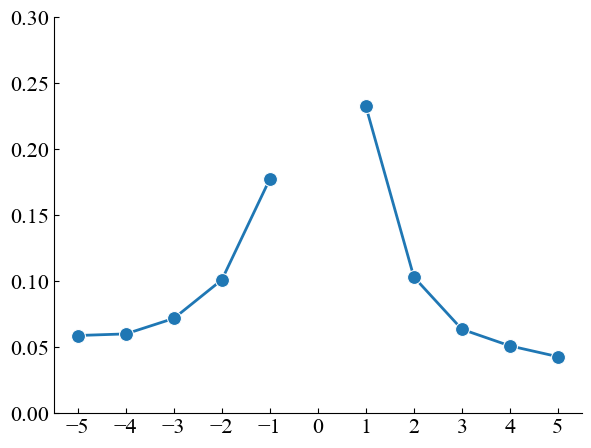

In [13]:
fig, ax = plt.subplots(figsize=(6,4.5))
fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")

sns.lineplot(data=df_ILIgp.query("-6 < pos_lag < 0"), x='pos_lag', y='ILI_prob', linewidth=2, marker='o', markersize = 10,color='C0')
sns.lineplot(data=df_ILIgp.query("0 < pos_lag < 6"), x='pos_lag', y='ILI_prob', linewidth=2, marker='o', markersize = 10,color='C0')
plt.ylim([0,0.3])
plt.xticks(ticks=np.arange(-5,6))
plt.xlabel('Lag')
plt.ylabel('Intrusion Conditional Response Probablility')
ax.set(xlabel=None, ylabel=None)
# plt.tick_params(labelleft=False)

plt.savefig('simu7_fig/simu7_ILI.pdf')
plt.show()